T1: Implementing the 10-armed Testbed

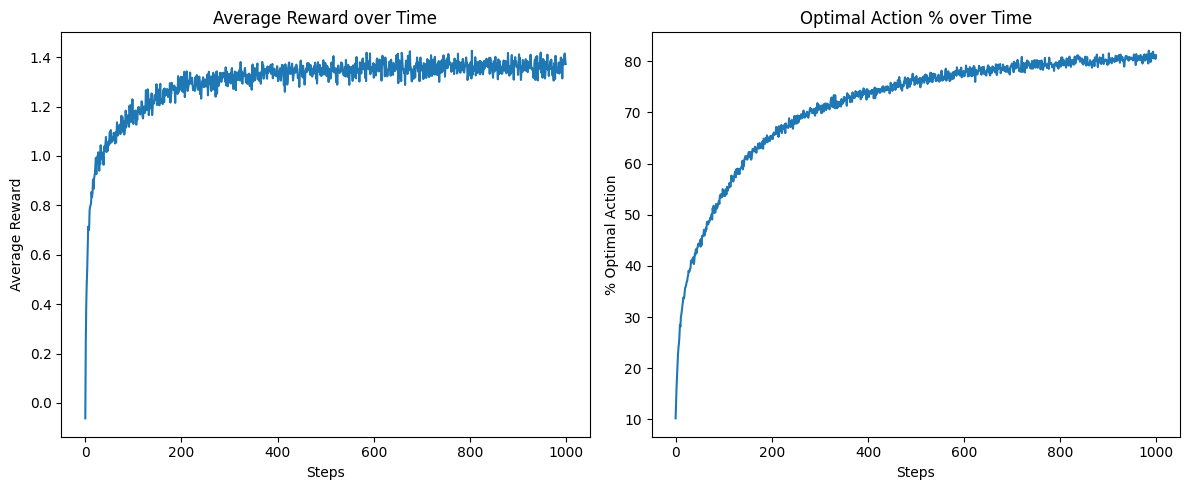

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 10  # number of arms
steps = 1000  # number of time steps per episode
episodes = 2000  # number of episodes
epsilon = 0.1  # ε-greedy parameter

# Arrays to store results
average_rewards = np.zeros(steps)
optimal_action_counts = np.zeros(steps)

# Simulate for multiple episodes
for ep in range(episodes):
    # True reward values for this episode
    true_q_values = np.random.normal(0, 1, k)

    # Track the optimal action
    optimal_action = np.argmax(true_q_values)

    # Initialize estimated values and counts
    estimated_q = np.zeros(k)
    action_counts = np.zeros(k)

    for t in range(steps):
        # ε-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.randint(k)
        else:
            action = np.argmax(estimated_q)
 # Get reward from normal distribution centered at true value
        reward = np.random.normal(true_q_values[action], 1)

        # Update action count and estimated value using incremental formula
        action_counts[action] += 1
        estimated_q[action] += (reward - estimated_q[action]) / action_counts[action]

        # Track if optimal action was chosen
        if action == optimal_action:
            optimal_action_counts[t] += 1

        # Accumulate reward
        average_rewards[t] += reward

# Average over episodes
average_rewards /= episodes
optimal_action_counts = (optimal_action_counts / episodes) * 100

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(average_rewards)
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward over Time")

plt.subplot(1, 2, 2)
plt.plot(optimal_action_counts)
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.title("Optimal Action % over Time")

plt.tight_layout()
plt.show()


T2: Comparing Performance for Different epsilon Values

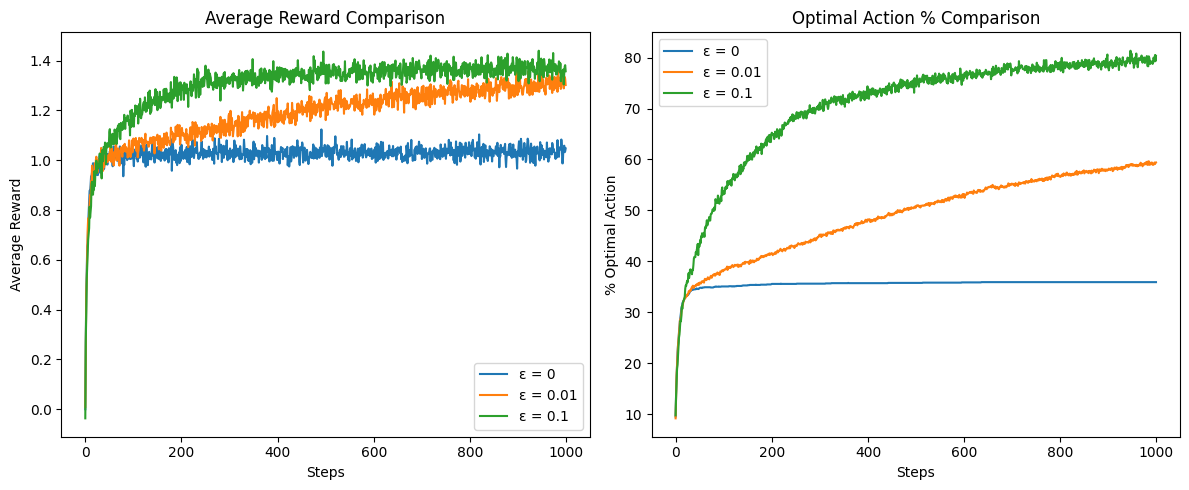

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate one run with given ε
def run_bandit(epsilon, steps=1000, episodes=2000, k=10):
    avg_rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)

    for ep in range(episodes):
        true_q = np.random.normal(0, 1, k)
        optimal_action = np.argmax(true_q)
        est_q = np.zeros(k)
        action_counts = np.zeros(k)

        for t in range(steps):
            if np.random.rand() < epsilon:
                action = np.random.randint(k)
            else:
                action = np.argmax(est_q)

            reward = np.random.normal(true_q[action], 1)
            action_counts[action] += 1
            est_q[action] += (reward - est_q[action]) / action_counts[action]

            avg_rewards[t] += reward
            if action == optimal_action:
                optimal_action_counts[t] += 1

    avg_rewards /= episodes
    optimal_action_counts = (optimal_action_counts / episodes) * 100

    return avg_rewards, optimal_action_counts

# Run for different ε values
epsilons = [0, 0.01, 0.1]
rewards_dict = {}
optimal_dict = {}

for eps in epsilons:
    rewards_dict[eps], optimal_dict[eps] = run_bandit(eps)

# Plotting Average Rewards
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for eps in epsilons:
    plt.plot(rewards_dict[eps], label=f"ε = {eps}")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward Comparison")
plt.legend()

# Plotting Optimal Action %
plt.subplot(1, 2, 2)
for eps in epsilons:
    plt.plot(optimal_dict[eps], label=f"ε = {eps}")
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.title("Optimal Action % Comparison")
plt.legend()

plt.tight_layout()
plt.show()
